In [1]:
import pandas as pd
import numpy as np
from fastai.core import *
from PIL import Image
from fastai.script import *
from fastai.vision import *
from fastai.callbacks import *
from fastai.distributed import *
from fastprogress import fastprogress
from torchvision.models import *

In [2]:
import json
from collections import defaultdict
import pdb
import numpy as np
from collections import defaultdict

%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
coco = Path('dataset1.v1.coco')
# coco = untar_data('classroomtest.coco.zip')
img_dir = Path('dataset1.v1.coco/images')
annotations_train = Path('dataset1.v1.coco/annotation/train_annotations.coco.json')
annotations_valid = Path('dataset1.v1.coco/annotation/valid_annotations.coco.json')

# annotation 여기에선 데이터 한꺼번에 불러오길래
# train val images 합쳐서 넣음
images, lbl_bbox = get_annotations(annotations_train)
images_,lbl_bbox_ = get_annotations(annotations_valid)
images.extend(images_)
lbl_bbox.extend(lbl_bbox_)

# learn.predict(img)/

In [5]:
with open(annotations_train) as f:
    train_json = json.load(f)
    
ncat = len(train_json['categories'])
train_json['categories']

[{'id': 0, 'name': 'dataset1', 'supercategory': 'none'},
 {'id': 1, 'name': '1', 'supercategory': 'dataset1'},
 {'id': 2, 'name': '3', 'supercategory': 'dataset1'},
 {'id': 3, 'name': '4', 'supercategory': 'dataset1'},
 {'id': 4, 'name': '5', 'supercategory': 'dataset1'},
 {'id': 5, 'name': '6', 'supercategory': 'dataset1'},
 {'id': 6, 'name': '7', 'supercategory': 'dataset1'},
 {'id': 7, 'name': '8', 'supercategory': 'dataset1'},
 {'id': 8, 'name': '9', 'supercategory': 'dataset1'},
 {'id': 9, 'name': 'eye', 'supercategory': 'dataset1'},
 {'id': 10, 'name': 'eye_close', 'supercategory': 'dataset1'},
 {'id': 11, 'name': 'eye_open', 'supercategory': 'dataset1'},
 {'id': 12, 'name': 'half_close', 'supercategory': 'dataset1'},
 {'id': 13, 'name': 'half_closed', 'supercategory': 'dataset1'},
 {'id': 14, 'name': 'open_eye', 'supercategory': 'dataset1'}]

In [6]:
for idx, lbl in enumerate(lbl_bbox):
    if len(lbl[1]) == 0:
        print(f"found empty annotation: {idx}")

In [7]:
## 돌렸을때 경고문구는 원래그럼. 예제에도 있었음.


img_list = ImageList.from_folder(img_dir)
#image size
sz = 224
# print(len(img_list))

img2bbox = dict(zip(images, lbl_bbox))
# img2bbox.sort()
print(type(images))
# cnt = 0
def get_y_func(o):
    filename = o.name
    if img2bbox.get(o.name):
        return img2bbox[o.name]
    else:
        # 데이터가 다 잘 들어간걸 확인했는데도 자꾸 오류가 나서 넣은 코드
        # 라벨링이 안된 사진이 들어갔을때 나는 오류라서
        # 임의로 bbox 리턴. 데이터 교체하면 오류 없을것.
        return [[[0, 0, 244, 244]], ['background']]

# ver 2
data = (ObjectItemList.from_folder(img_dir)
        .split_by_folder()                          
        .label_from_func(get_y_func)
        .transform(get_transforms(), tfm_y=True, size=224)
        .databunch(bs=8, collate_fn=bb_pad_collate, num_workers=0)
        .normalize(imagenet_stats)
        ) 
# data.add_test_folder(ObjectItemList.from_folder('test')
#              .split_none()
#              .transform(size=224)
#             .databunch(bs=8, collate_fn=bb_pad_collate, num_workers=0)
#             .normalize(imagenet_stats)
#             )

# Test = (ObjectItemList.from_folder(img_dir/'test')
#              .split_none()
#              .transform(size=224)
#             .databunch(bs=8, collate_fn=bb_pad_collate, num_workers=0)
#             .normalize(imagenet_stats))
# ver original
# data = (ObjectItemList.from_folder('dataset1.v1.coco/images')
#         .split_by_folder()                          
#         .label_from_func(get_y_func)
#         .transform(get_transforms(), tfm_y=True, size=224)
#         .databunch(bs=8, collate_fn=bb_pad_collate, num_workers=0)
#         .normalize(imagenet_stats)
#        )

data

<class 'list'>


C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\core.py:302: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(a, dtype=dtype, **kwargs)
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


ImageDataBunch;

Train: LabelList (605 items)
x: ObjectItemList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: ObjectCategoryList
ImageBBox (224, 224),ImageBBox (224, 224),ImageBBox (224, 224),ImageBBox (224, 224),ImageBBox (224, 224)
Path: dataset1.v1.coco\images;

Valid: LabelList (173 items)
x: ObjectItemList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: ObjectCategoryList
ImageBBox (224, 224),ImageBBox (224, 224),ImageBBox (224, 224),ImageBBox (224, 224),ImageBBox (224, 224)
Path: dataset1.v1.coco\images;

Test: None

C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\vision\data.py:361: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  ..\torch\csrc\utils\python_arg_parser.cpp:882.)
  if len((labels - self.pad_idx).nonzero()) == 0: return


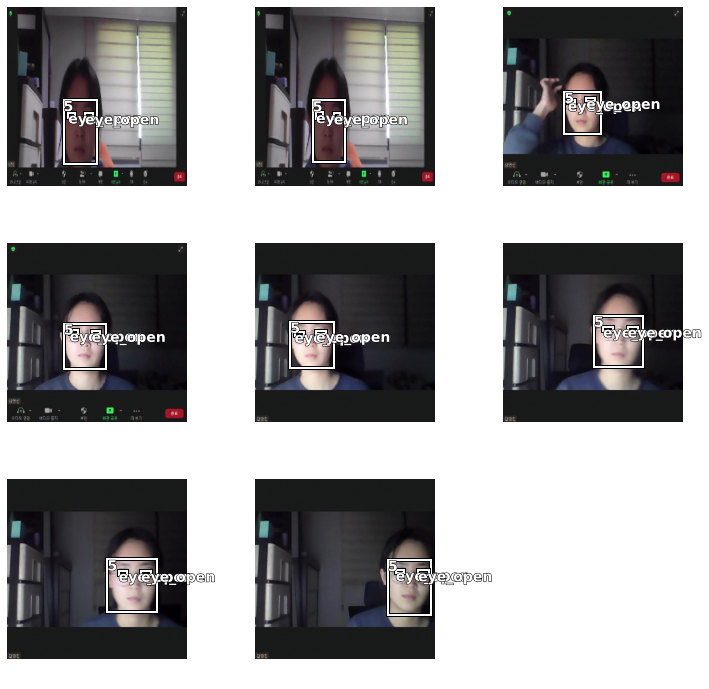

In [8]:
data.show_batch(rows=3, ds_type= DatasetType.Valid, figsize=(10,10))

In [9]:
# for idx, lbl in enumerate(lbl_bbox):
#     if len(lbl[1]) == 0:
#         print(f"found empty annotation: {idx}")

        
# with open(annotations_train) as f:
#     train_json = json.load(f)

# ncat = len(train_json['categories'])
# train_json['categories']
# custom_head= 만들면 최고....

In [10]:
# def hw2corners(ctr, hw): return torch.cat([ctr-hw/2, ctr+hw/2], dim=1)

# # str 중심값, bbox 가로세로 메트릭스 연산으로 꼭지점 좌표 구하기
# # 그 좌표를 이용해서 anchor 박스보여주기

# def create_anchors(ncells=[4], zooms=[1.],ratios=[(1.,1.)]):
#     a_scales = [(z*i,z*j) for z in zooms for (i,j) in ratios]
#     k = len(a_scales)
#     a_x = np.concatenate([np.repeat(np.linspace(-1+1/nc, 1-1/nc, nc), nc) 
#                           for nc in ncells])
#     a_y = np.concatenate([np.tile(np.linspace(-1+1/nc, 1-1/nc, nc), nc)
#                           for nc in ncells])
#     a_ctrs = np.repeat(np.stack([a_x, a_y], axis=1), k, axis=0)
#     a_sz = np.concatenate([np.array([[2*o/nc,2*p/nc] 
#                                      for i in range(nc*nc)
#                                      for o,p in a_scales])
#                            for nc in ncells])
#     grid_sz = np.concatenate([np.array([2/nc 
#                                         for i in range(nc*nc)
#                                         for o,p in a_scales])
#                               for nc in ncells])
#     anc = np.concatenate([a_ctrs, a_sz], axis=1)
#     grid_sizes = torch.tensor(grid_sz).type(torch.FloatTensor).unsqueeze(1).cuda()
#     anchors = torch.tensor(anc).type(torch.FloatTensor).cuda()
#     anchor_cnr = hw2corners(anchors[:,:2], anchors[:,2:])
#     return anchors, anchor_cnr, grid_sizes

In [11]:
# anchors, anchor_cnr, grid_sizes = create_anchors(ncells=[4,2,1],
#                                                  zooms=[0.7, 1., 1.3],
#                                                  ratios=[(1.,1.), (1., 0.5), (0.5, 1.)])

In [12]:

# def intersect(box_a, box_b):
#     max_xy = torch.min(box_a[:, None, 2:], box_b[None, :, 2:])
#     min_xy = torch.max(box_a[:, None, :2], box_b[None, :, :2])
#     inter = torch.clamp((max_xy - min_xy), min=0)
#     return inter[:, :, 0] * inter[:, :, 1]

# def box_sz(b): return ((b[:, 2]-b[:, 0]) * (b[:, 3]-b[:, 1]))

# def jaccard(box_a, box_b):
#     inter = intersect(box_a, box_b)
#     union = box_sz(box_a).unsqueeze(1) + box_sz(box_b).unsqueeze(0) - inter
#     return inter / union

# def map_to_ground_truth(overlaps, print_it=False):
#     prior_overlap, prior_idx = overlaps.max(1)
#     if print_it: print(prior_overlap)
# #     pdb.set_trace()
#     gt_overlap, gt_idx = overlaps.max(0)
#     gt_overlap[prior_idx] = 1.99
#     for i,o in enumerate(prior_idx): gt_idx[o] = i
#     return gt_overlap,gt_idx

# def actn_to_bb(actn, anchors):
#     actn_bbs = torch.tanh(actn)
#     actn_centers = (actn_bbs[:,:2]/2 * grid_sizes) + anchors[:,:2]
#     actn_hw = (actn_bbs[:,2:]/2+1) * anchors[:,2:]
#     return hw2corners(actn_centers, actn_hw)


In [13]:
# def one_hot_embedding(labels, num_classes):
#     return torch.eye(num_classes)[labels.data.cpu()]

# class BCE_Loss(nn.Module):
#     def __init__(self, num_classes=14):
#         super().__init__()
#         self.num_classes = num_classes

#     def forward(self, pred, targ):
#         t = one_hot_embedding(targ, self.num_classes+1)
# #         t = t[:,:-1].contiguous().cuda()
# #         x = pred[:,:-1]
#         # in fastai v1, the background is encoded as the first class, rather than the last one
#         t = t[:,1:].contiguous().cuda()
#         x = pred[:,1:]
#         w = self.get_weight(x,t)
#         return F.binary_cross_entropy_with_logits(x, t, w, size_average=False)/self.num_classes
    
#     def get_weight(self,x,t): return None
    
# class FocalLoss(BCE_Loss):
#     def get_weight(self,x,t):
#         alpha,gamma = 0.25,2.
#         p = x.sigmoid()
#         pt = p*t + (1-p)*(1-t)
#         w = alpha*t + (1-alpha)*(1-t)
#         return (w * (1-pt).pow(gamma)).detach()

# loss_f = FocalLoss(ncat)


In [14]:
# # remove padding - 이미지속에 존재하는 오브잭트 수가 각각 달라서 발생하는 문제를 해결하기 위해
# # 가장 많은걸 기준으로 0으로 패딩 넣음

# def get_y(bbox,clas):
#     bbox = bbox.view(-1,4)
#     bb_keep = ((bbox[:,2]-bbox[:,0])>0).nonzero()[:,0]
#     return bbox[bb_keep],clas[bb_keep]

# def ssd_1_loss(pred_bbox,pred_clas,bbox,clas):
#     bbox,clas = get_y(bbox,clas)
#     if len(bbox) == 0 and len(clas) == 0:
#         return 0.0, 0.0
#     a_ic = actn_to_bb(pred_bbox, anchors)
#     overlaps = jaccard(bbox.data, anchor_cnr.data)
#     gt_overlap,gt_idx = map_to_ground_truth(overlaps,False)
#     gt_clas = clas[gt_idx]
#     pos = gt_overlap > 0.4
#     pos_idx = torch.nonzero(pos)[:,0]
#     gt_clas[~pos] = 0 # background coded as 0
#     gt_bbox = bbox[gt_idx]
#     loc_loss = ((a_ic[pos_idx] - gt_bbox[pos_idx]).abs()).mean()
#     clas_loss  = loss_f(pred_clas, gt_clas)
#     #print(f"loc_loss: {loc_loss}, clas_loss: {clas_loss}")
#     return loc_loss, clas_loss

# def ssd_loss(pred,targ_bb,targ_c):
#     lcs,lls = 0.,0.
# #    i = 1
# #    for b_c,b_bb,bbox,clas in zip(*pred,targ_bb,targ_c):
#     for pr_bb, pr_c, ta_bb, ta_c in zip(*pred, targ_bb, targ_c):
# #         print(f"item {i}")
# #         if i == 5:
# #             pdb.set_trace()
# #         i = i+1
# #        loc_loss,clas_loss = ssd_1_loss(b_c,b_bb,bbox,clas)
#         loc_loss, clas_loss = ssd_1_loss(pr_bb, pr_c, ta_bb, ta_c)
#         lls += loc_loss
#         lcs += clas_loss
# #    if print_it: print(f'loc: {lls.data[0]}, clas: {lcs.data[0]}')
#     return 20*lls+lcs

In [15]:
class StdConv(nn.Module):
    def __init__(self, nin, nout, stride=2, drop=0.1):
        super().__init__()
        self.conv = nn.Conv2d(nin, nout, 3, stride=stride, padding=1)
        self.bn = nn.BatchNorm2d(nout)
        self.drop = nn.Dropout(drop)
        
    def forward(self, x): return self.drop(self.bn(F.relu(self.conv(x))))
def flatten_conv(x,k):
    bs,nf,gx,gy = x.size()
    x = x.permute(0,2,3,1).contiguous()
    return x.view(bs,-1,nf//k)

class OutConv(nn.Module):
    def __init__(self, k, nin, bias):
        super().__init__()
        self.k = k
        self.oconv1 = nn.Conv2d(nin, 4*k, 3, padding=1) # first bboxes
        self.oconv2 = nn.Conv2d(nin, (ncat+1)*k, 3, padding=1) # than class labels
        self.oconv2.bias.data.zero_().add_(bias)
        
    def forward(self, x):
        return [flatten_conv(self.oconv1(x), self.k),
                flatten_conv(self.oconv2(x), self.k)]


# 모델 헤드

class SSD_Head(nn.Module):
    def __init__(self, k, bias):
        super().__init__()
        self.drop = nn.Dropout(0.25)
        self.sconv0 = StdConv(512,256, stride=1)
#         self.sconv1 = StdConv(256,256)
        self.sconv2 = StdConv(256,256)
        self.out = OutConv(k, 256, bias)
        
    def forward(self, x):
        x = self.drop(F.relu(x))
        x = self.sconv0(x)
#         x = self.sconv1(x)
        x = self.sconv2(x)
        return self.out(x)

In [16]:
head_reg4 = SSD_Head(k=1, bias=-3.)
learn = cnn_learner(data, models.resnet34, custom_head=head_reg4)

learn.summary

<bound method model_summary of Learner(data=ImageDataBunch;

Train: LabelList (605 items)
x: ObjectItemList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: ObjectCategoryList
ImageBBox (224, 224),ImageBBox (224, 224),ImageBBox (224, 224),ImageBBox (224, 224),ImageBBox (224, 224)
Path: dataset1.v1.coco\images;

Valid: LabelList (173 items)
x: ObjectItemList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: ObjectCategoryList
ImageBBox (224, 224),ImageBBox (224, 224),ImageBBox (224, 224),ImageBBox (224, 224),ImageBBox (224, 224)
Path: dataset1.v1.coco\images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mod

In [83]:
itemno = 1
item = data.valid_ds[itemno][0]
x, y = data.one_item(item)
# get one batch of data (x - img, y - ground truth)
#x, y = data.one_batch(cpu=False)

print("x", x)
print("y", y)

x tensor([[[[-1.6384, -1.4667, -1.4652,  ..., -1.6727, -1.6750, -1.6898],
          [-1.7021, -1.5891, -1.5944,  ..., -1.6874, -1.6857, -1.6750],
          [-1.7535, -1.7612, -1.7496,  ..., -1.6774, -1.6785, -1.6850],
          ...,
          [-1.7611, -1.6537, -1.6547,  ..., -1.5069, -1.4531, -1.4424],
          [-1.6551, -1.6949, -1.7376,  ..., -1.6499, -1.6653, -1.7012],
          [-1.6213, -1.7316, -1.7459,  ..., -1.8924, -1.9880, -2.0323]],

         [[-1.6155, -1.6958, -1.6778,  ..., -1.5805, -1.5830, -1.5980],
          [-1.5830, -1.6331, -1.6417,  ..., -1.5956, -1.5938, -1.5830],
          [-1.5504, -1.5553, -1.5728,  ..., -1.5854, -1.5865, -1.5932],
          ...,
          [-1.6710, -1.5611, -1.5622,  ..., -1.6904, -1.7175, -1.7284],
          [-1.5626, -1.6033, -1.6469,  ..., -1.6160, -1.6030, -1.5834],
          [-1.5280, -1.6408, -1.6554,  ..., -1.5008, -1.4380, -1.4230]],

         [[-1.4036, -1.4384, -1.4384,  ..., -1.3513, -1.3537, -1.3687],
          [-1.4384, -1.4384,

In [18]:
b_bb, b_clas = learn.model(x)
b_clas.shape, b_bb.shape


(torch.Size([1, 16, 16]), torch.Size([1, 16, 4]))

In [19]:
idx = 0
b_clasi = b_clas[idx].type(torch.FloatTensor).cuda()
b_bboxi = b_bb[idx].type(torch.FloatTensor).cuda()

b_clasi.shape, b_bboxi.shape, b_clasi[0], b_bboxi[0]

(torch.Size([16, 16]),
 torch.Size([16, 4]),
 tensor([-0.8257,  2.6230, -0.0124,  0.4320, -0.9817,  1.2883,  1.5828, -0.1610,
         -0.3161,  0.4243,  0.7200, -0.6748,  1.4262,  0.0437,  0.1705,  0.1689],
        device='cuda:0', grad_fn=<SelectBackward>),
 tensor([ 2.0233, -0.7475,  1.8384,  0.7014], device='cuda:0',
        grad_fn=<SelectBackward>))

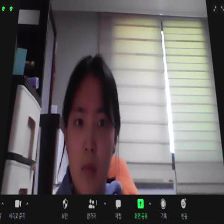

In [20]:
#예시하나의 바운딩 박스

label = data.train_ds[itemno][1]
bbox, clas = label.data
bbox = bbox.cuda()
clas = torch.tensor(clas).cuda()
bboxi = bbox
clasi = clas

# bboxi.shape, clasi.shape, bboxi, clasi
data.train_ds[itemno][0]

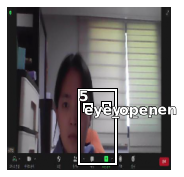

In [21]:
item.show(y=label)

In [22]:
ncells = 4
k = 1 # num boxes per cell
first_ctr = -1 + 2/(2*ncells)
last_ctr  =  1 - 2/(2*ncells)
a_x = np.repeat(np.linspace(first_ctr, last_ctr, ncells), ncells)
a_y = np.tile(np.linspace(first_ctr, last_ctr, ncells), ncells)
a_sz = np.array([2/ncells for _ in a_x])
anchors = torch.tensor(np.stack([a_x, a_y, a_sz, a_sz], axis=1)).type(torch.FloatTensor).cuda()
anchors

tensor([[-0.7500, -0.7500,  0.5000,  0.5000],
        [-0.7500, -0.2500,  0.5000,  0.5000],
        [-0.7500,  0.2500,  0.5000,  0.5000],
        [-0.7500,  0.7500,  0.5000,  0.5000],
        [-0.2500, -0.7500,  0.5000,  0.5000],
        [-0.2500, -0.2500,  0.5000,  0.5000],
        [-0.2500,  0.2500,  0.5000,  0.5000],
        [-0.2500,  0.7500,  0.5000,  0.5000],
        [ 0.2500, -0.7500,  0.5000,  0.5000],
        [ 0.2500, -0.2500,  0.5000,  0.5000],
        [ 0.2500,  0.2500,  0.5000,  0.5000],
        [ 0.2500,  0.7500,  0.5000,  0.5000],
        [ 0.7500, -0.7500,  0.5000,  0.5000],
        [ 0.7500, -0.2500,  0.5000,  0.5000],
        [ 0.7500,  0.2500,  0.5000,  0.5000],
        [ 0.7500,  0.7500,  0.5000,  0.5000]], device='cuda:0')

In [23]:
def hw2corners(ctr, hw): return torch.cat([ctr-hw/2, ctr+hw/2], dim=1)
anchor_cnr = hw2corners(anchors[:,:2], anchors[:,2:])
anchor_cnr

tensor([[-1.0000, -1.0000, -0.5000, -0.5000],
        [-1.0000, -0.5000, -0.5000,  0.0000],
        [-1.0000,  0.0000, -0.5000,  0.5000],
        [-1.0000,  0.5000, -0.5000,  1.0000],
        [-0.5000, -1.0000,  0.0000, -0.5000],
        [-0.5000, -0.5000,  0.0000,  0.0000],
        [-0.5000,  0.0000,  0.0000,  0.5000],
        [-0.5000,  0.5000,  0.0000,  1.0000],
        [ 0.0000, -1.0000,  0.5000, -0.5000],
        [ 0.0000, -0.5000,  0.5000,  0.0000],
        [ 0.0000,  0.0000,  0.5000,  0.5000],
        [ 0.0000,  0.5000,  0.5000,  1.0000],
        [ 0.5000, -1.0000,  1.0000, -0.5000],
        [ 0.5000, -0.5000,  1.0000,  0.0000],
        [ 0.5000,  0.0000,  1.0000,  0.5000],
        [ 0.5000,  0.5000,  1.0000,  1.0000]], device='cuda:0')

In [24]:
grid_sizes = torch.tensor(np.array([2/ncells]), requires_grad=False).type(torch.FloatTensor).unsqueeze(1).cuda()
grid_sizes

tensor([[0.5000]], device='cuda:0')

In [25]:
#함수는 이것만 돌리기 this is 찐

def one_hot_embedding(labels, num_classes):
    return torch.eye(num_classes)[labels.data.cpu()]

class BCE_Loss(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.num_classes = num_classes

    def forward(self, pred, targ):
        t = one_hot_embedding(targ, self.num_classes+1)
        t = t[:,1:].contiguous().cuda()
        x = pred[:,1:]
        w = self.get_weight(x,t)
        return F.binary_cross_entropy_with_logits(x, t, w, size_average=False)/self.num_classes
    
    def get_weight(self,x,t): return None

loss_f = BCE_Loss(ncat)

# remove padding - images in a minibatch will have a different number of objects
# those with fewer objects will have their bbox groundtruth tensor padded with 0s
def get_y(bbox,clas):
    bbox = bbox.view(-1,4)
    bb_keep = ((bbox[:,2]-bbox[:,0])>0).nonzero()[:,0]
    return bbox[bb_keep],clas[bb_keep]

def ssd_1_loss(pred_bbox,pred_clas,bbox,clas):
    bbox,clas = get_y(bbox,clas)
    if len(bbox) == 0 and len(clas) == 0:
        return 0.0, 0.0
    a_ic = actn_to_bb(pred_bbox, anchors)
    overlaps = jaccard(bbox.data, anchor_cnr.data).cuda()
    gt_overlap,gt_idx = map_to_ground_truth(overlaps,False)
    gt_clas = clas[gt_idx].type(torch.LongTensor).cuda()
    pos = gt_overlap > 0.4
    pos_idx = torch.nonzero(pos)[:,0]
    gt_clas[~pos] = 0 # background coded as 0
    gt_bbox = bbox[gt_idx]
    loc_loss = ((a_ic[pos_idx] - gt_bbox[pos_idx]).abs()).mean()
    clas_loss  = loss_f(pred_clas, gt_clas)
    #print(f"loc_loss: {loc_loss}, clas_loss: {clas_loss}")
    return loc_loss, clas_loss

def ssd_loss(pred,targ_bb,targ_c):
    lcs,lls = 0.,0.
    for pr_bb, pr_c, ta_bb, ta_c in zip(*pred, targ_bb, targ_c):
        loc_loss, clas_loss = ssd_1_loss(pr_bb, pr_c, ta_bb, ta_c)
        lls += loc_loss
        lcs += clas_loss
    return 20*lls+lcs

# centre+height/width -> corners
def hw2corners(ctr, hw): return torch.cat([ctr-hw/2, ctr+hw/2], dim=1)

def intersect(box_a, box_b):
    max_xy = torch.min(box_a[:, None, 2:], box_b[None, :, 2:])
    min_xy = torch.max(box_a[:, None, :2], box_b[None, :, :2])
    inter = torch.clamp((max_xy - min_xy), min=0)
    return inter[:, :, 0] * inter[:, :, 1]

def box_sz(b): return ((b[:, 2]-b[:, 0]) * (b[:, 3]-b[:, 1]))

def jaccard(box_a, box_b):
    inter = intersect(box_a, box_b)
    union = box_sz(box_a).unsqueeze(1) + box_sz(box_b).unsqueeze(0) - inter
    return inter / union

def map_to_ground_truth(overlaps, print_it=False):
    prior_overlap, prior_idx = overlaps.max(1)
    if print_it: print(prior_overlap)
#     pdb.set_trace()
    gt_overlap, gt_idx = overlaps.max(0)
    gt_overlap[prior_idx] = 1.99
    for i,o in enumerate(prior_idx): gt_idx[o] = i
    return gt_overlap,gt_idx

def actn_to_bb(actn, anchors):
    actn_bbs = torch.tanh(actn.type(torch.FloatTensor)).cuda()
#     print(actn_bbs[:,:2]/2, grid_sizes, anchors[:,:2].shape)
    actn_centers = (actn_bbs[:,:2]/2 * grid_sizes).cuda() + anchors[:,:2].cuda()
    actn_hw = (actn_bbs[:,2:]/2+1) * anchors[:,2:]
    return hw2corners(actn_centers, actn_hw)

In [26]:
overlaps = jaccard(bbox.data.cuda(), anchor_cnr).cuda()
overlaps

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0999, 0.3213, 0.0000, 0.0000, 0.0862, 0.2697, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0293, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0221, 0.0139, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]],
       device='cuda:0')

In [27]:
#제일 가능성있는 박스 2개
overlaps.max(0)
overlaps.max(1)

gt_overlap, gt_idx = map_to_ground_truth(overlaps)
gt_overlap, gt_idx

(tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         1.9900, 1.9900, 0.0000, 0.0000, 0.0862, 0.2697, 0.0000],
        device='cuda:0'),
 tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0], device='cuda:0'))

In [28]:
gt_clas = clas[gt_idx].type(torch.LongTensor).cuda(); gt_clas

tensor([ 4,  4,  4,  4,  4,  4,  4,  4,  4, 11, 11,  4,  4,  4,  4,  4],
       device='cuda:0')

In [29]:
thresh = 0.5
pos = gt_overlap > thresh
pos_idx = torch.nonzero(pos)[:,0]
neg_idx = torch.nonzero(~pos)[:,0]
pos_idx

tensor([ 9, 10], device='cuda:0')

In [30]:
a_ic = actn_to_bb(b_bboxi, anchors)
gt_bbox = bbox.cuda()[gt_idx]
loc_loss = ((a_ic[pos_idx] - gt_bbox[pos_idx]).abs()).mean()
clas_loss  = F.cross_entropy(b_clasi, gt_clas)
loc_loss,clas_loss

(tensor(0.2562, device='cuda:0', grad_fn=<MeanBackward0>),
 tensor(4.0135, device='cuda:0', grad_fn=<NllLossBackward>))

In [31]:
a_ic[pos_idx] - gt_bbox[pos_idx]

tensor([[-0.2222, -0.1847,  0.4319,  0.1684],
        [ 0.1776, -0.0176,  0.3560,  0.4914]], device='cuda:0',
       grad_fn=<SubBackward0>)

In [32]:
head_reg4 = SSD_Head(k=1, bias=-3.)
learn = cnn_learner(data, models.resnet34, loss_func=ssd_loss, custom_head=head_reg4)

epoch,train_loss,valid_loss,time
0,95.353172,#na#,00:27


C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai

C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai

C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai

C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai

C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai

C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


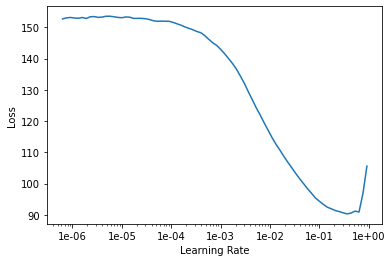

In [33]:
lr_find(learn)
learn.recorder.plot()

In [34]:
lr=0.5
learn.fit_one_cycle(10, lr)

epoch,train_loss,valid_loss,time
0,54.408180,53.309120,00:27
1,367.370483,3988.232178,00:26
2,2163.425781,31588.941406,00:26
3,1545.291626,467.202850,00:26
4,564.558472,172.759933,00:25
5,214.872177,87.463654,00:25
6,98.408791,6286.992188,00:26
7,59.763931,21968.361328,00:26
8,48.861732,903.620483,00:27
9,44.398411,4618.861328,00:25


C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai

C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai

C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai

C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai

C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai

C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai

C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai

C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai

C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai

C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai

C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\

C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai

C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai

C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai

C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai

C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai

C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\

C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai

C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai

C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai

C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai

C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\

C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai

C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai

C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai

C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai

C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\

C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai

C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai

C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai

C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai

C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai

C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\

C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai

C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai

C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai

C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai

C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\

C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai

C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai

C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai

C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai

C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai

C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\

C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai

C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai

C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai

C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai

C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\

C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai

C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai

C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai

C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai

C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai

C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\

In [35]:
learn.save('stage1-focal-loss')

In [43]:
def corners2hw(corners): return torch.cat([corners[:,:2], corners[:,2:] - corners[:,:2]], dim=1)

def show_results(max_show=0, printit=False):
    if max_show == 0:
        max_show = len(data.valid_ds)
    else:
        max_show = min(max_show, len(data.valid_ds))
    figsize = (10, max_show*5)
    fig,axs = plt.subplots(max_show, 2, figsize=figsize)
    i = 0
    while i < max_show:
        img, label = data.valid_ds[i]
        img.show(ax=axs[i,0], y=label, figsize=(5,5))        
        x, y = data.one_item(img)
#         print(x)
        pred_bb, pred_cc = learn.model(x)
        
        pred_cc = pred_cc.squeeze() # remove the singleton batch dimension
        pred_bb = pred_bb.squeeze()
#         print(pred_cc)
#         print(">>>>",pred_cc)
#         print('\n')
        pred_clas = pred_cc.max(1)[1].type(torch.IntTensor).cuda() # get the index of the max as the predicted clas
        pred_clas_prob = pred_cc.max(1)[0].sigmoid() # get the sigmoid of the max as the class probability
        print(pred_clas,pred_clas_prob)
        
        pos_idx = pred_clas > 0
#         if i == 1:
#             pdb.set_trace()
        a_ic = actn_to_bb(pred_bb, anchors)
        anc_cnr = anchor_cnr.clone()
        if printit:
            print(f"i={i}, a_ic orig")
            print(a_ic[pos_idx])
            print(f"i={i}, anchor orig")
            print(anc_cnr[pos_idx])
        h = 224
        w = 224
        # convert to image coordinates (add 1 and scale by img size)
        a_ic.add_(1)
        anc_cnr.add_(1)
        if printit:
            print(f"i={i}, a_ic moved")
            print(a_ic[pos_idx])
            print(f"i={i}, anchor moved")
            print(anc_cnr[pos_idx])        
        a_ic.mul_(torch.tensor([h/2, w/2, h/2, w/2]).cuda()).long()
        anc_cnr.mul_(torch.tensor([h/2, w/2, h/2, w/2]).cuda()).long()
        if printit:
            print(f"i={i}, a_ic rescaled")
            print(a_ic[pos_idx])
            print(f"i={i}, anchor rescaled")
            print(anc_cnr[pos_idx])
        # select only bboxes that detect something else than background (0)
        pos_pred_clas = pred_clas[pos_idx]
        pos_a_ic = a_ic[pos_idx]
        if len(pos_pred_clas) > 0:
#             if i == 1:
#                 pdb.set_trace()
            pred_label = ImageBBox.create(224, 224, pos_a_ic.cpu(), pos_pred_clas.cpu(), data.train_ds.y.classes)
            img.show(ax=axs[i,1], y=pred_label, figsize=(5,5))
        else:
            img.show(ax=axs[i,1], figsize= (5,5))
        i = i+1

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], device='cuda:0',
       dtype=torch.int32) tensor([0.4971, 0.4849, 0.4797, 0.4840, 0.4950, 0.4766, 0.4956, 0.4772, 0.5001,
        0.4960, 0.5048, 0.4943, 0.4958, 0.4948, 0.4970, 0.4936],
       device='cuda:0', grad_fn=<SigmoidBackward>)
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], device='cuda:0',
       dtype=torch.int32) tensor([0.4969, 0.4852, 0.4797, 0.4841, 0.4950, 0.4767, 0.4957, 0.4774, 0.5000,
        0.4961, 0.5048, 0.4943, 0.4958, 0.4948, 0.4970, 0.4936],
       device='cuda:0', grad_fn=<SigmoidBackward>)
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], device='cuda:0',
       dtype=torch.int32) tensor([0.4934, 0.4887, 0.4820, 0.4869, 0.4971, 0.4841, 0.5019, 0.4828, 0.4998,
        0.4962, 0.5019, 0.4954, 0.4954, 0.4940, 0.4959, 0.4930],
       device='cuda:0', grad_fn=<SigmoidBackward>)
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], device='cuda:0',
       dtype=torch.int32) tensor([0.49

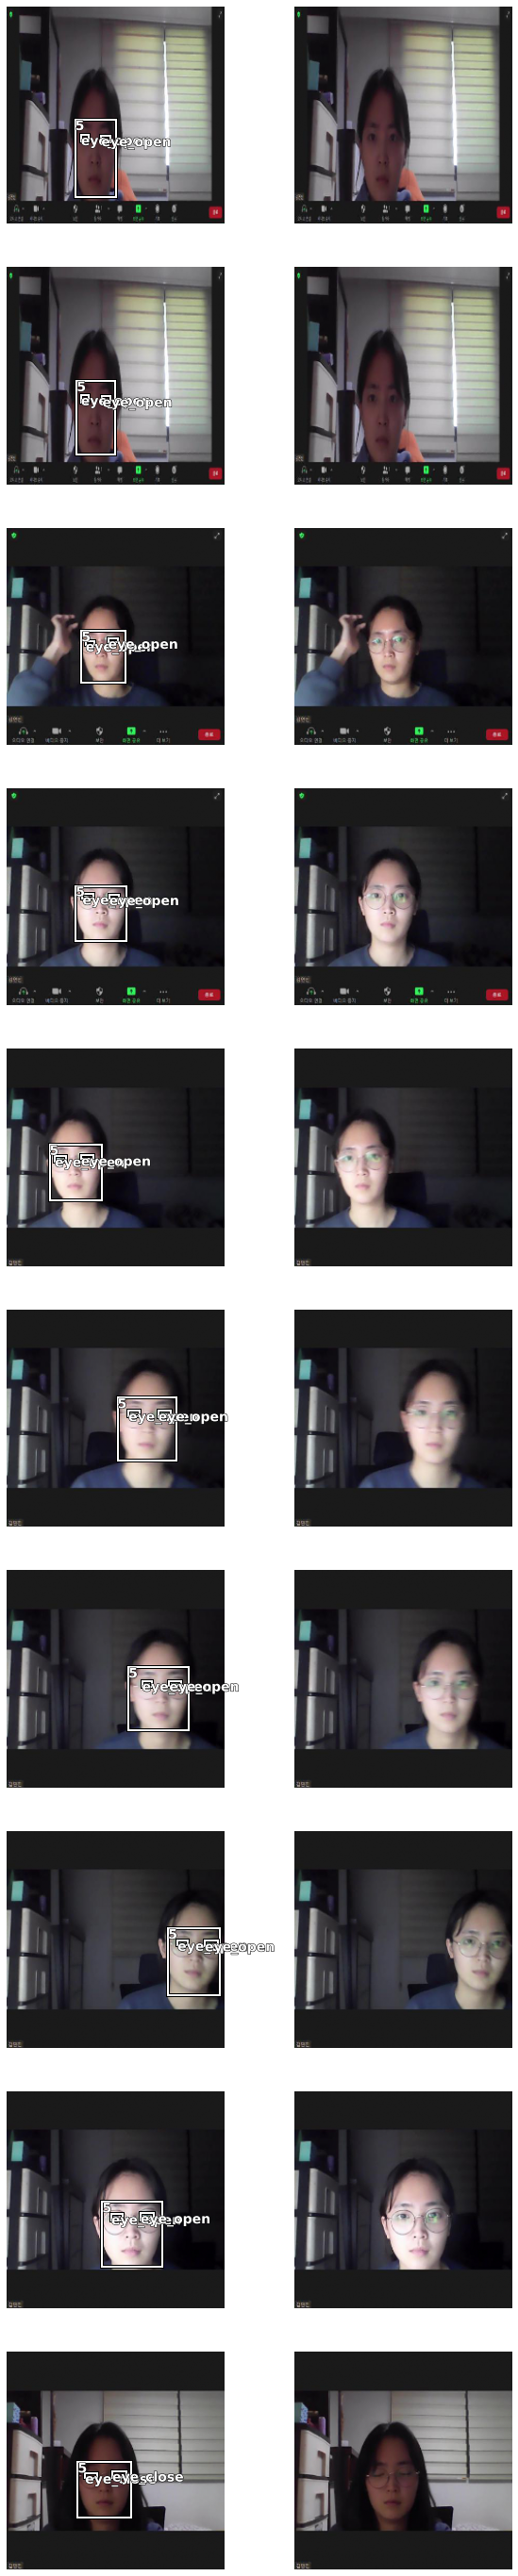

In [44]:
show_results(max_show=10, printit=False)

In [66]:
learn.export('model')

# import tensorflow as tf
# from tensorflow import reshape
from PIL import Image
data.classes

['background',
 '1',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 'eye',
 'eye_close',
 'eye_open',
 'eye_opened',
 'half_close',
 'half_closed',
 'open_eye']

In [46]:
img = open_image('WIN_20210131_03_09_21_Pro-058_jpg.rf.3551bfdc120ed519174f5d1e44b2fe05.jpg')

# image = Image.open('WIN_20210131_03_09_21_Pro-058_jpg.rf.3551bfdc120ed519174f5d1e44b2fe05.jpg')
# img = pil2tensor(image, dtype=np.int64)

# print(img.type(torch.IntTensor))

# # image_shape = tf.stack([3, 416, 416])
# # image = tf.reshape(img, img.shape)
# img.shape

# # data.Test = (ObjectItemList.from_folder(coco/'test').split_none())
# # data.Test
# open_image(img)

In [47]:
# path = Path('model/')
# learn = load_learner(path)

# data.labels

In [48]:
# learner = create_cnn(data=data, arch=arch, 
#                      metrics=[metrics.accuracy_thresh, partial(metrics.fbeta, beta=1)], 
#                      pretrained=False, 
#                      callback_fns=[
#                          ShowGraph, 
#                          partial(callbacks.tracker.EarlyStoppingCallback, monitor='fbeta', mode='max', min_delta=1e-4, patience=3),
#                          partial(callbacks.tracker.SaveModelCallback, monitor='fbeta', mode='max', name='resnet50_1118'),
# #                          partial(callbacks.tracker.ReduceLROnPlateauCallback, patience=1)
#                      ],
#                      path='./',
#                      model_dir='models'
#                     )

In [175]:
from fastai.basic_train import * 
from fastai.vision.data import ObjectCategoryList,ObjectCategoryProcessor,MultiCategoryList
from fastai.core import *
from fastai.vision.image import ImageBBox

from functools import partial

# overwrite...

def newcreate(h, w, bboxes, labels=None, classes=None, scale=True):
    "Create an ImageBBox object from `bboxes`."
    if isinstance(bboxes, np.ndarray) and bboxes.dtype == np.object: bboxes = np.array([bb for bb in bboxes])
    bboxes = tensor(bboxes).float()
    tr_corners = torch.cat([bboxes[:,0][:,None], bboxes[:,3][:,None]], 1)
    bl_corners = bboxes[:,1:3].flip(1)
    bboxes = torch.cat([bboxes[:,:2], tr_corners, bl_corners, bboxes[:,2:]], 1)
    flow = FlowField((h,w), bboxes.view(-1,2))
    return ImageBBox(flow, labels=labels, classes=classes, y_first=True, scale=scale)

def newreconstruct(classes,t, x):
    (bboxes, labels) = t
    if len((labels).nonzero()) == 0: return
    i = (labels).nonzero().min()
    bboxes,labels = bboxes[i:],labels[i:]
#     print("x size",*x.size)
    return newcreate(*x.size, bboxes, labels=labels, classes=classes, scale=False)


def newpredict(self, item:ItemBase, return_x:bool=False, batch_first:bool=True, with_dropout:bool=False, **kwargs):
        print("Return predicted class, label and probabilities for `item`.")
        batch = self.data.one_item(item)
        res = self.pred_batch(batch=batch, with_dropout=with_dropout)
        raw_pred,x = grab_idx(res,0,batch_first=batch_first),batch[0]
        norm = getattr(self.data,'norm',False)
        if norm:
            x = self.data.denorm(x)
            if norm.keywords.get('do_y',False): raw_pred = self.data.denorm(raw_pred)
        ds = self.data.single_ds
        print('###raw:',raw_pred)
#       original code error...(( jjang shi ro ))
#       analyze_pred(pred, thresh=0.5): return raw_pred.argmax(0)[none] doesn't work
#       added the code "labels = labels.argmax(dim=0)[None]"
        (bboxes, labels) = raw_pred
        idx = labels.max(1)
        s_labels = [idx.indices[i] for i in range(len(idx.values)) if idx.values[i]>0 ]
        print(s_labels[0])
        labels = idx.indices
        pred = (bboxes, labels)
        print('##### pred:',pred)
        x = ds.x.reconstruct(grab_idx(x, 0))
        y = newreconstruct(ds.y, pred, x) if has_arg(ds.y.reconstruct, 'x') else ds.y.reconstruct(pred)
        return (x, y, pred,raw_pred) if return_x else (y, pred,raw_pred)

result = newpredict(self=learn,item= img, return_x=False, batch_first=True, with_dropout=False)



# fig,axs = plt.subplots(max_show, 2, figsize=(10,5))
# img.show(ax=axs[0], y=result[0], figsize=(5,5))

result[1]


Return predicted class, label and probabilities for `item`.
###raw: [tensor([[-26.8491,  38.2294,  -5.3446,  -6.1866],
        [-52.9706,  45.5760,  -6.8943,  -8.1335],
        [-65.6810,  69.1336, -10.2379, -10.0598],
        [-56.9678,  53.1467,  -8.9253,  -9.7911],
        [-29.2939,  48.8305,  -6.3676,  -6.2672],
        [-69.0542,  59.2647,  -7.0914,  -7.4965],
        [-64.4600,  85.8226,  -9.7859,  -9.3496],
        [-63.6512,  61.4636,  -7.8158,  -7.0672],
        [-33.7516,  32.1335,  -5.2234,  -5.0228],
        [-62.1990,  28.8304,  -5.2447,  -5.3910],
        [-37.6968,  35.3649,  -6.2933,  -5.7739],
        [-25.0571,  26.0771,  -5.0541,  -4.7927],
        [-17.2541,  23.4668,  -3.9008,  -3.7984],
        [-43.2148,  26.7711,  -3.8217,  -4.2078],
        [-21.6637,  27.9002,  -3.9917,  -4.0221],
        [-14.0400,  18.2011,  -3.8564,  -3.4367]]), tensor([[-2.4805e-02, -3.8580e+01, -3.5773e+01, -2.9476e+01, -2.0708e+01,
         -2.7193e+01, -3.0490e+01, -3.8758e+01, -5.2376

(tensor([[-26.8491,  38.2294,  -5.3446,  -6.1866],
         [-52.9706,  45.5760,  -6.8943,  -8.1335],
         [-65.6810,  69.1336, -10.2379, -10.0598],
         [-56.9678,  53.1467,  -8.9253,  -9.7911],
         [-29.2939,  48.8305,  -6.3676,  -6.2672],
         [-69.0542,  59.2647,  -7.0914,  -7.4965],
         [-64.4600,  85.8226,  -9.7859,  -9.3496],
         [-63.6512,  61.4636,  -7.8158,  -7.0672],
         [-33.7516,  32.1335,  -5.2234,  -5.0228],
         [-62.1990,  28.8304,  -5.2447,  -5.3910],
         [-37.6968,  35.3649,  -6.2933,  -5.7739],
         [-25.0571,  26.0771,  -5.0541,  -4.7927],
         [-17.2541,  23.4668,  -3.9008,  -3.7984],
         [-43.2148,  26.7711,  -3.8217,  -4.2078],
         [-21.6637,  27.9002,  -3.9917,  -4.0221],
         [-14.0400,  18.2011,  -3.8564,  -3.4367]]),
 tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))

In [ ]:
# learn.load('stage1-focal-loss')

In [ ]:
# pred_class,pred_idx,outputs = learn.predict(img)
# pred_class

i=0, a_ic orig
tensor([], device='cuda:0', size=(0, 4), grad_fn=<IndexBackward>)
i=0, anchor orig
tensor([], device='cuda:0', size=(0, 4))
i=0, a_ic moved
tensor([], device='cuda:0', size=(0, 4), grad_fn=<IndexBackward>)
i=0, anchor moved
tensor([], device='cuda:0', size=(0, 4))
i=0, a_ic rescaled
tensor([], device='cuda:0', size=(0, 4), grad_fn=<IndexBackward>)
i=0, anchor rescaled
tensor([], device='cuda:0', size=(0, 4))


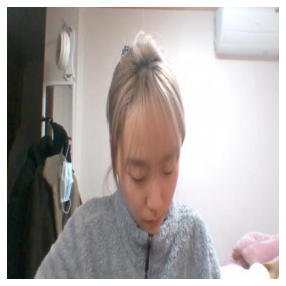

In [176]:


def show_predictedimg(img, printit=1):
        x, y = data.one_item(img)
        pred_bb, pred_cc = learn.model(x)
        pred_cc = pred_cc.squeeze() # remove the singleton batch dimension
        pred_bb = pred_bb.squeeze()
        pred_clas = pred_cc.max(1)[1] # get the index of the max as the predicted clas
        pred_clas_prob = pred_cc.max(1)[0].sigmoid() # get the sigmoid of the max as the class probability
        pos_idx = pred_clas > 0
#         if i == 1:
#             pdb.set_trace()
        a_ic = actn_to_bb(pred_bb, anchors)
        anc_cnr = anchor_cnr.clone()
        if printit:
            print(f"i={i}, a_ic orig")
            print(a_ic[pos_idx])
            print(f"i={i}, anchor orig")
            print(anc_cnr[pos_idx])
        h = 224
        w = 224
        # convert to image coordinates (add 1 and scale by img size)
        a_ic.add_(1)
        anc_cnr.add_(1)
        if printit:
            print(f"i={i}, a_ic moved")
            print(a_ic[pos_idx])
            print(f"i={i}, anchor moved")
            print(anc_cnr[pos_idx])        
        a_ic.mul_(torch.tensor([h/2, w/2, h/2, w/2]).cuda()).long()
        anc_cnr.mul_(torch.tensor([h/2, w/2, h/2, w/2]).cuda()).long()
        if printit:
            print(f"i={i}, a_ic rescaled")
            print(a_ic[pos_idx])
            print(f"i={i}, anchor rescaled")
            print(anc_cnr[pos_idx])
        # select only bboxes that detect something else than background (0)
        pos_pred_clas = pred_clas[pos_idx]
        pos_a_ic = a_ic[pos_idx]
        if len(pos_pred_clas) > 0:
#             if i == 1:
#                 pdb.set_trace()
            pred_label = ImageBBox.create(224, 224, pos_a_ic.cpu(), pos_pred_clas.cpu(), data.train_ds.y.classes)
            img.show(ax=axs[i,1], y=pred_label, figsize=(5,5))
        else:
            img.show( figsize= (5,5))
            
            
# result[0].show(ax=1, y=img, figsize=(5,5)) ==> 다 0:background일때 none 타입 반환

# result[1] : bbox 좌표와 predicted class 정보
show_predictedimg(img)